# Figures: cross-validation results

In [147]:
%matplotlib 

import numpy as np
import pylab as plt
import seaborn as sns
import pickle
import matplotlib

import sparseRRR

def sns_styleset():
    sns.set_context('paper')
    sns.set_style('ticks')
    matplotlib.rcParams['axes.linewidth']    = .5
    matplotlib.rcParams['xtick.major.width'] = .5
    matplotlib.rcParams['ytick.major.width'] = .5
    matplotlib.rcParams['xtick.major.size'] = 2
    matplotlib.rcParams['ytick.major.size'] = 2
    matplotlib.rcParams['xtick.minor.size'] = 1
    matplotlib.rcParams['ytick.minor.size'] = 1
    matplotlib.rcParams['font.size']       = 6
    matplotlib.rcParams['axes.titlesize']  = 7
    matplotlib.rcParams['axes.labelsize']  = 6
    matplotlib.rcParams['legend.fontsize'] = 6
    matplotlib.rcParams['xtick.labelsize'] = 6
    matplotlib.rcParams['ytick.labelsize'] = 6
    matplotlib.rcParams['figure.dpi'] = 120     # only affects the notebook

sns_styleset()

In [148]:
scala2020cv   = pickle.load(open('pickles/cvresults-scala2020.pickle', 'rb'))
scala2019cv   = pickle.load(open('pickles/cvresults-scala2019.pickle', 'rb'))
cadwell2016cv = pickle.load(open('pickles/cvresults-cadwell2016.pickle', 'rb'))
gouwens2020cv = pickle.load(open('pickles/cvresults-gouwens2020.pickle', 'rb'))

<IPython.core.display.Javascript object>


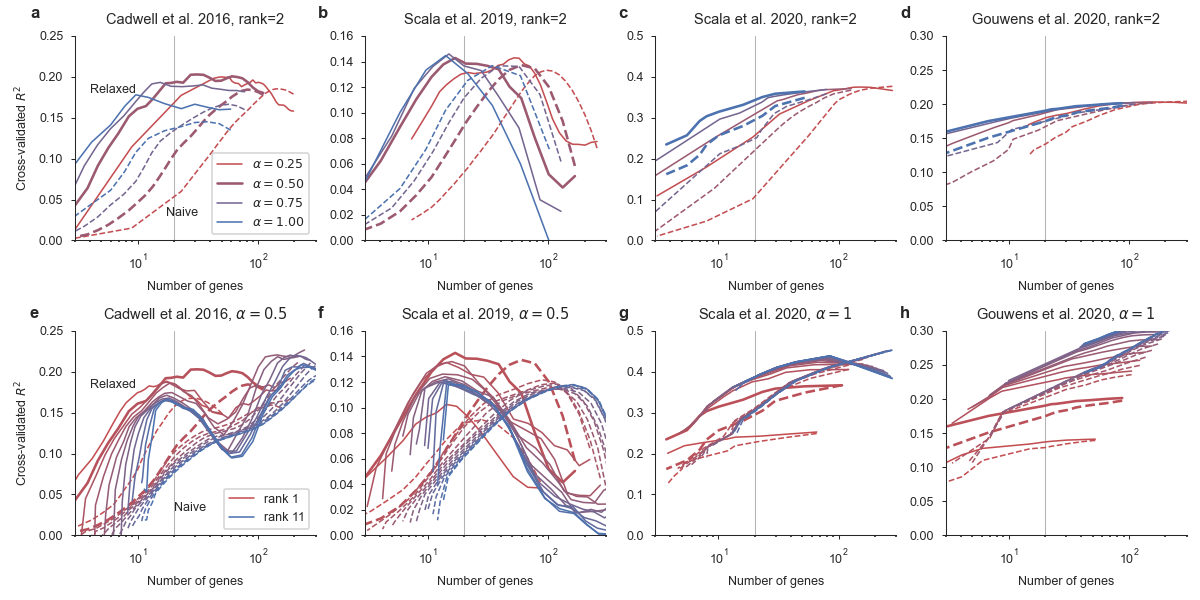

Text(0.75, 0.47, 'h')

In [150]:
import warnings

fig = plt.figure(figsize=(8, 4))

ylims = [.25, .16, .5, .3]
highlight = [1, 1, 3, 3]
alphas = [.25, .5, .75, 1]
alphaused = [.5, .5, 1, 1]
titles = ['Cadwell et al. 2016', 'Scala et al. 2019', 'Scala et al. 2020', 'Gouwens et al. 2020']

for datasetnum, cvresults in enumerate([cadwell2016cv, scala2019cv, scala2020cv, gouwens2020cv]):

    plt.subplot(2,4,datasetnum+1)
    colA = np.array([76, 114, 176]) / 256
    colB = np.array([196, 78, 82])  / 256
    for alphaid in range(4):
        # suppressing "mean of empty slice" warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            n = np.nanmean(cvresults[0][2], axis=(0,1))
            c = np.nanmean(cvresults[0][0], axis=(0,1))
            cr = np.nanmean(cvresults[0][1], axis=(0,1))
        
        if alphaid == highlight[datasetnum]:
            lw = 1.25
        else:
            lw = .75
        col = (colA * alphaid/3 + colB * (3-alphaid)/3)
        plt.plot(n[:,alphaid], cr[:,alphaid], linewidth=lw, color=col, 
                 label=r'$\alpha={:.2f}$'.format(alphas[alphaid]))
        plt.plot(n[:,alphaid], c[:,alphaid], '--', linewidth=lw, color=col)

    if datasetnum==0:
        plt.legend()
        plt.text(4, .18, 'Relaxed', fontsize=6)
        plt.text(17, .03, 'Naive', fontsize=6)
        plt.ylabel(r'Cross-validated $R^2$')
    plt.xscale('log')
    plt.xlabel('Number of genes')#, labelpad=-3)
    plt.title(titles[datasetnum] + ', rank=2')
    plt.ylim([0, ylims[datasetnum]])
    plt.xlim([3, 300])
    #if datasetnum==3:
    #    plt.xlim([3,1100])
    plt.plot([20,20], [0,ylims[datasetnum]], color=[.7,.7,.7], linewidth=.5, zorder=0)
    

    plt.subplot(2,4,datasetnum+5)
    colA = np.array([76, 114, 176]) / 256
    colB = np.array([196, 78, 82])  / 256
    maxRank = len(cvresults[1])
    for rank in range(1,maxRank+1):
        # suppressing "mean of empty slice" warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            n = np.nanmean(cvresults[1][rank][2], axis=(0,1))
            c = np.nanmean(cvresults[1][rank][0], axis=(0,1))
            cr = np.nanmean(cvresults[1][rank][1], axis=(0,1))
    
        if rank==2:
            lw = 1.25
        else:
            lw = .75
        col = (colA * (rank-1)/(maxRank-1) + colB * (maxRank-rank)/(maxRank-1))
        if rank==1 or rank==maxRank:
            plt.plot(n, cr, color=col, linewidth=lw, label='rank {}'.format(rank))
        else:
            plt.plot(n, cr, color=col, linewidth=lw)    
        plt.plot(n, c, '--', color=col, linewidth=lw)

    if datasetnum==0:
        plt.legend(loc='lower right')
        plt.text(4, .18, 'Relaxed', fontsize=6)
        plt.text(20, .03, 'Naive', fontsize=6)
        plt.ylabel(r'Cross-validated $R^2$')
    plt.xscale('log')
    plt.xlabel('Number of genes')#, labelpad=-3)
    plt.title(titles[datasetnum] + r', $\alpha={}$'.format(alphaused[datasetnum]))
    plt.ylim([0, ylims[datasetnum]])
    plt.xlim([3, 300])
    #if datasetnum==3:
    #    plt.ylim([0, 0.4])
    #    plt.xlim([3,1100])
    plt.plot([20,20], [0,ylims[datasetnum]], color=[.7,.7,.7], linewidth=.5, zorder=0)

sns.despine()
plt.tight_layout()

fig.text(.025, .97, 'a', fontsize=8, fontweight='bold')
fig.text(.265, .97, 'b', fontsize=8, fontweight='bold')
fig.text(.515, .97, 'c', fontsize=8, fontweight='bold')
fig.text(.75, .97, 'd', fontsize=8, fontweight='bold')
fig.text(.025, .47, 'e', fontsize=8, fontweight='bold')
fig.text(.265, .47, 'f', fontsize=8, fontweight='bold')
fig.text(.515, .47, 'g', fontsize=8, fontweight='bold')
fig.text(.75, .47, 'h', fontsize=8, fontweight='bold')

plt.savefig('figures/cv.png', dpi=200)
plt.savefig('figures/cv.pdf')

## Preprocessing variants

In [151]:
scala2020cv   = pickle.load(open('pickles/cvresults-scala2020-variants.pickle', 'rb'))
scala2019cv   = pickle.load(open('pickles/cvresults-scala2019-variants.pickle', 'rb'))
cadwell2016cv = pickle.load(open('pickles/cvresults-cadwell2016-variants.pickle', 'rb'))

<IPython.core.display.Javascript object>


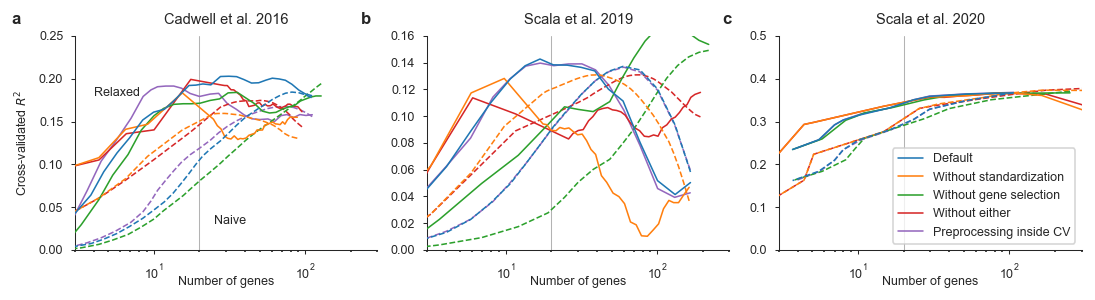

data nr:  0
data nr:  1
data nr:  2


Text(0.66, 0.92, 'c')

In [152]:
import warnings

fig = plt.figure(figsize=(7.3, 2))

ylims = [.25, .16, .5]
highlight = [1, 1, 3]
alphas = [.25, .5, .75, 1]
alphaused = [.5, .5, 1]
titles = ['Cadwell et al. 2016', 'Scala et al. 2019', 'Scala et al. 2020']

legends = ['Default', 'Without standardization', 'Without gene selection',
           'Without either', 'Preprocessing inside CV']

for datasetnum, cvresults in enumerate([cadwell2016cv, scala2019cv, scala2020cv]):
    print('data nr: ', datasetnum)

    plt.subplot(1,3,datasetnum+1)
    for mode in range(5):
        # suppressing "mean of empty slice" warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            n = np.nanmean(cvresults[mode][2], axis=(0,1))
            c = np.nanmean(cvresults[mode][0], axis=(0,1))
            cr = np.nanmean(cvresults[mode][1], axis=(0,1))
        
        color = next(plt.gca()._get_lines.prop_cycler)['color']
        plt.plot(n, cr, linewidth=.75, color=color, label=legends[mode], zorder=10-mode)
        plt.plot(n, c, '--', linewidth=.75, color=color, zorder=10-mode)

    if datasetnum==0:
        plt.text(4, .18, 'Relaxed', fontsize=6)
        plt.text(25, .03, 'Naive', fontsize=6)
        plt.ylabel(r'Cross-validated $R^2$')
    if datasetnum==2:
        plt.legend()
    plt.xscale('log')
    plt.xlabel('Number of genes', labelpad=-3)
    plt.title(titles[datasetnum])
    plt.ylim([0, ylims[datasetnum]])
    plt.xlim([3, 300])
    plt.plot([20,20], [0,ylims[datasetnum]], color=[.7,.7,.7], linewidth=.5, zorder=0)
    
sns.despine()
plt.tight_layout()

fig.text(.01, .92, 'a', fontsize=8, fontweight='bold')
fig.text(.33, .92, 'b', fontsize=8, fontweight='bold')
fig.text(.66, .92, 'c', fontsize=8, fontweight='bold')

plt.savefig('figures/preprocessing.png', dpi=200)
plt.savefig('figures/preprocessing.pdf')

## Comparison to Witten et al. and Suo et al.

In [153]:
scala2020cv   = pickle.load(open('pickles/cvresults-scala2020.pickle', 'rb'))
scala2019cv   = pickle.load(open('pickles/cvresults-scala2019.pickle', 'rb'))
cadwell2016cv = pickle.load(open('pickles/cvresults-cadwell2016.pickle', 'rb'))
gouwens2020cv = pickle.load(open('pickles/cvresults-gouwens2020.pickle', 'rb'))

scala2020cv_ws   = pickle.load(open('pickles/cvresults-scala2020-wittensuo.pickle', 'rb'))
scala2019cv_ws   = pickle.load(open('pickles/cvresults-scala2019-wittensuo.pickle', 'rb'))
cadwell2016cv_ws = pickle.load(open('pickles/cvresults-cadwell2016-wittensuo.pickle', 'rb'))
gouwens2020cv_ws = pickle.load(open('pickles/cvresults-gouwens2020-wittensuo.pickle', 'rb'))

<IPython.core.display.Javascript object>


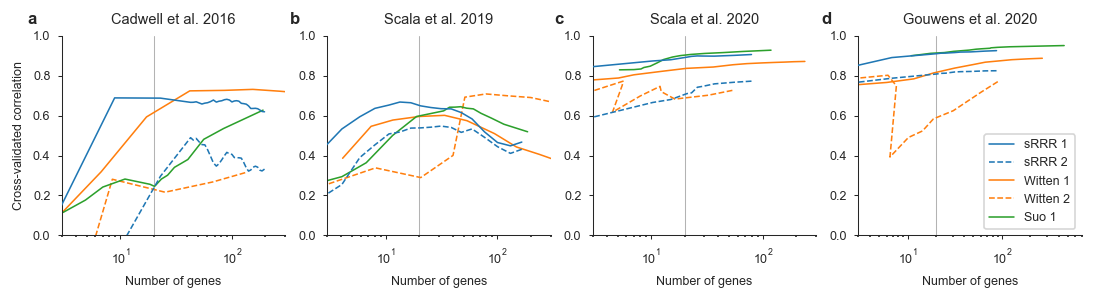

Text(0.75, 0.92, 'd')

In [154]:
import warnings

fig = plt.figure(figsize=(7.3, 2))

highlight = [1, 1, 3, 1]     # ?
alphas = [.25, .5, .75, 1] # ? 
alphaused = [.5, .5, 1, 1]
alphaids=[0,1,2,3]
titles = ['Cadwell et al. 2016', 'Scala et al. 2019', 'Scala et al. 2020', 'Gouwens et al. 2020']

for datasetnum, cvresults in enumerate([cadwell2016cv, scala2019cv, scala2020cv, gouwens2020cv]):
    cvresults_ws = [cadwell2016cv_ws, scala2019cv_ws, scala2020cv_ws, gouwens2020cv_ws][datasetnum]

    plt.subplot(1,4,datasetnum+1)
    colA = np.array([76, 114, 176]) / 256
    colB = np.array([196, 78, 82])  / 256
    alphaid = alphaids[datasetnum]
    
#     for alphaid in range(4):
    # suppressing "mean of empty slice" warnings
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', category=RuntimeWarning)
        n = np.nanmean(cvresults[0][2], axis=(0,1))
        c = np.nanmean(cvresults[0][4], axis=(0,1))
        
#         if alphaid == highlight[datasetnum]:
#             lw = 1.25
#         else:
#             lw = .75
#     col = (colA * alphaid/3 + colB * (3-alphaid)/3)
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot(n[:,alphaid], c[:,alphaid,0], linewidth=.75, color=col, label='sRRR 1', zorder=10)
#              label=r'$\alpha={:.2f}$'.format(alphas[alphaid]))
    plt.plot(n[:,alphaid], c[:,alphaid,1], '--', linewidth=.75, color=col, label='sRRR 2', zorder=10)
        
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', category=RuntimeWarning)
            
        col = next(plt.gca()._get_lines.prop_cycler)['color']

        x = np.nanmean(cvresults_ws[1][:,:,:,0], axis=(0,1))
        y = np.nanmean(cvresults_ws[0][:,:,:,0], axis=(0,1))
        plt.plot(x, y, color=col, linewidth=.75, label='Witten 1')
        
        x = np.nanmean(cvresults_ws[1][:,:,:,1], axis=(0,1))
        y = np.nanmean(cvresults_ws[0][:,:,:,1], axis=(0,1))
        plt.plot(x, y, '--', color=col, linewidth=.75, label='Witten 2')
        
        col = next(plt.gca()._get_lines.prop_cycler)['color']
        x = np.nanmean(cvresults_ws[3], axis=(0,1))
        y = np.nanmean(cvresults_ws[2], axis=(0,1))
        plt.plot(x, y, color=col, linewidth=.75, label='Suo 1')
        
    if datasetnum==0:
#         plt.text(4, .8, 'Component 1', fontsize=6)
#         plt.text(40,.15, 'Component 2', fontsize=6)
        plt.ylabel('Cross-validated correlation')
    if datasetnum==3:
        plt.legend(loc='lower right')        
    plt.xscale('log')
    plt.xlabel('Number of genes') #, labelpad=-3)
    plt.title(titles[datasetnum])
    plt.ylim([0, 1])
    plt.xlim([3, 300])
    if datasetnum==3:
        plt.xlim([3,700])
    plt.plot([20,20], [0,1], color=[.7,.7,.7], linewidth=.5, zorder=0)
    
sns.despine()
plt.tight_layout()


fig.text(.025, .92, 'a', fontsize=8, fontweight='bold')
fig.text(.265, .92, 'b', fontsize=8, fontweight='bold')
fig.text(.506, .92, 'c', fontsize=8, fontweight='bold')
fig.text(.75, .92, 'd', fontsize=8, fontweight='bold')

plt.savefig('figures/corr.png', dpi=200)
plt.savefig('figures/corr.pdf')